In [1]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

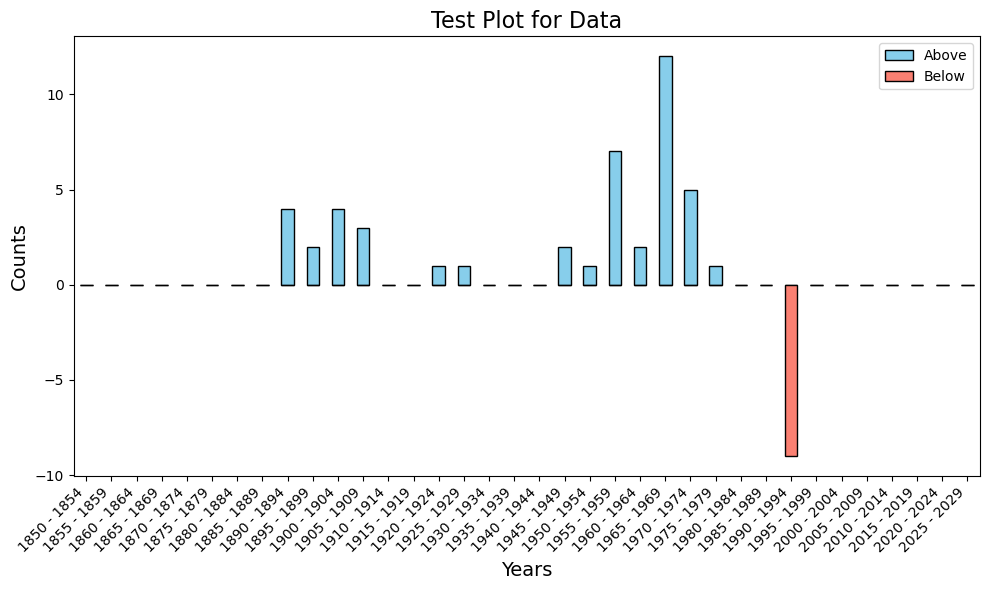

In [4]:
# Load your data
filename = 'change_point_indices_3.0_40_20_20.csv'
df = pd.read_csv(filename)

# Adjust values
df['Adjusted_Values'] = df['Values'] + 1850

# Define bins from 1850 to 2030 in steps of 5
bins = range(1850, 2035, 5)
labels = [f"{i} - {i+4}" for i in bins[:-1]]

# Creating the bins in the DataFrame
df['Value_bins'] = pd.cut(df['Adjusted_Values'], bins=bins, labels=labels, include_lowest=False, right=False)

# Filter data based on Condition and count occurrences
value_counts_above = df[df['Condition'] == 'Above']['Value_bins'].value_counts().sort_index()
value_counts_below = df[df['Condition'] == 'Below']['Value_bins'].value_counts().sort_index()

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
value_counts_above.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black', label='Above')
(-value_counts_below).plot(kind='bar', ax=ax, color='salmon', edgecolor='black', label='Below')

# Add labels and title
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Test Plot for Data', fontsize=16)

# Set specific x-axis labels
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

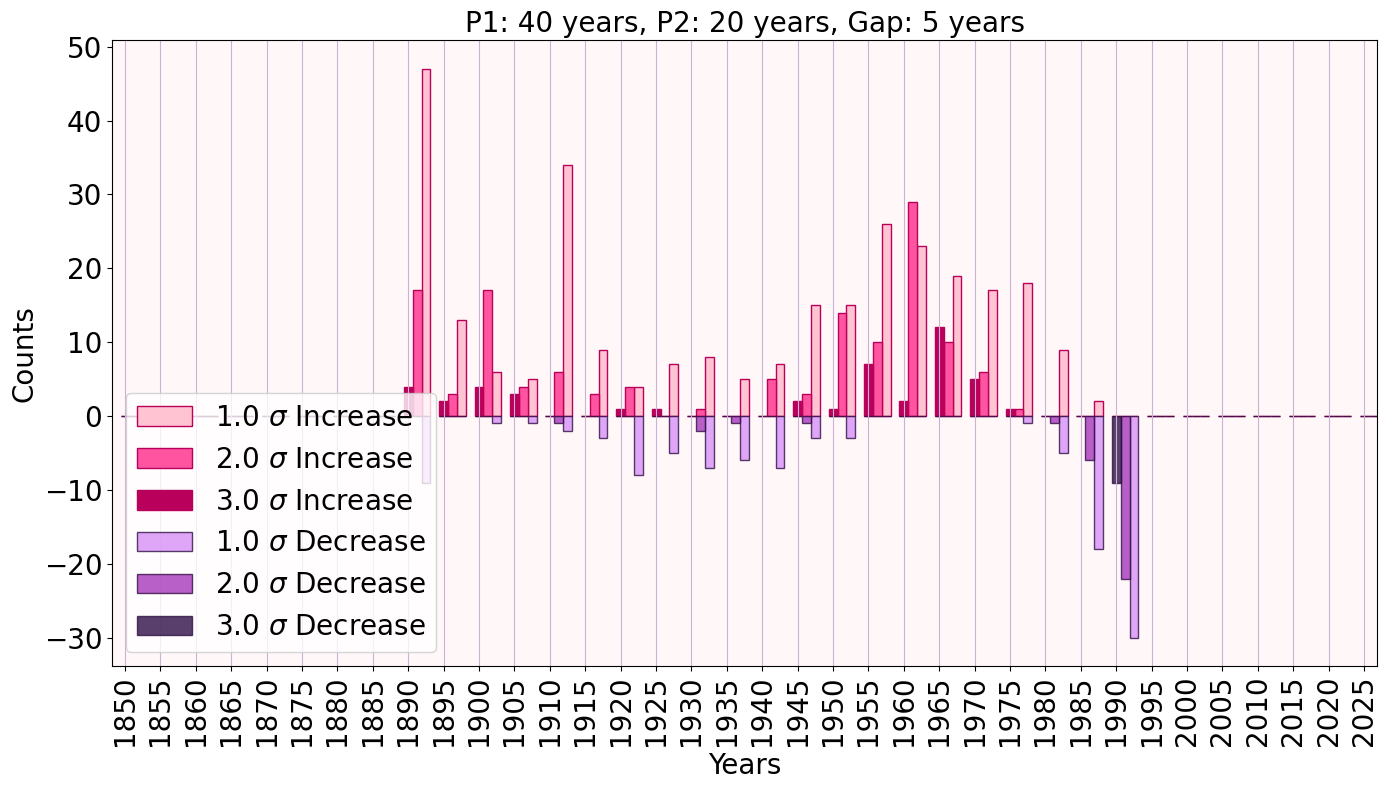

In [7]:
# Load and process data
files = [
    ('change_point_indices_1.0_40_20_20.csv', r'1.0 $\sigma$', '#ffc3d2', '#D791F7'),
    ('change_point_indices_2.0_40_20_20.csv', r'2.0 $\sigma$', '#ff55a0', '#a638bb'),
    ('change_point_indices_3.0_40_20_20.csv', r'3.0 $\sigma$', '#b9005a', '#2f1046')
]

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_facecolor('#FFF7F8')
bar_width = 0.25
positions = np.arange(len(range(1850, 2035, 5)) - 1)
edgecolor_above = '#b9005a'
edgecolor_below = '#2f1046'

for i, (filename, label, color_above, color_below) in enumerate(files):
    df = pd.read_csv(filename)
    df['Adjusted_Values'] = df['Values'] + 1850
    bins = range(1850, 2035, 5)
    labels = [f"{i} - {i+4}" for i in bins[:-1]]
    df['Value_bins'] = pd.cut(df['Adjusted_Values'], bins=bins, labels=labels, include_lowest=True, right=False)
    value_counts_above = df[df['Condition'] == 'Above']['Value_bins'].value_counts().sort_index()
    value_counts_below = df[df['Condition'] == 'Below']['Value_bins'].value_counts().sort_index()
    
    value_counts_above.plot(kind='bar', ax=ax, color=color_above, width=bar_width, position=i-1.5, label=f'{label} Increase', edgecolor=edgecolor_above)
    (-value_counts_below).plot(kind='bar', ax=ax, color=color_below, width=bar_width, position=i-1.5, alpha=0.8, label=f'{label} Decrease', edgecolor=edgecolor_below)

fontsize = 20
ax.set_xlabel('Years', fontsize=fontsize)
ax.set_ylabel('Counts', fontsize=fontsize)
ax.set_title('P1: 40 years, P2: 20 years, Gap: 5 years', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
order = [0, 2, 4, 1, 3, 5]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=fontsize, loc='lower left')

ax.set_xticks(np.arange(len(range(1850, 2035, 5)) - 1))
ax.set_xticklabels([f"{i}" for i in range(1850, 2030, 5)], fontsize=fontsize)

ax.grid(True, which='both', axis='x', color='#cbb2d5')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tight_layout()
plt.show()

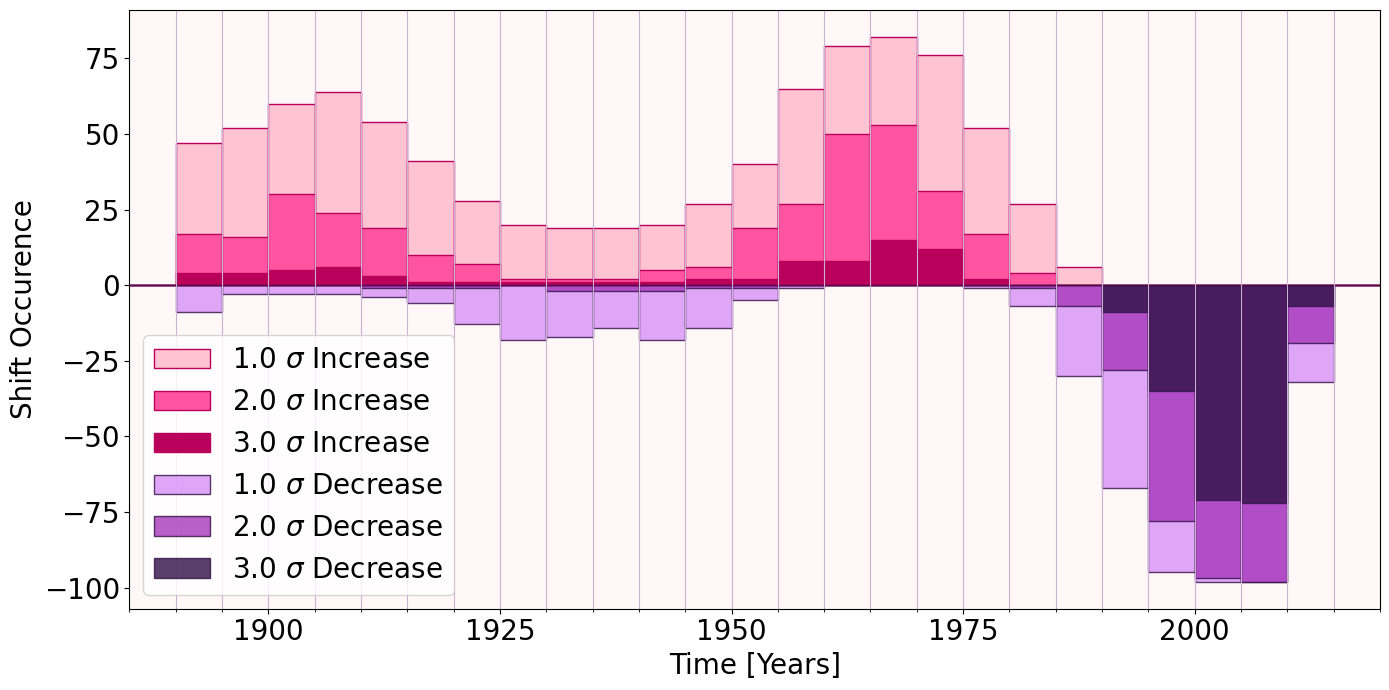

In [5]:
# Load and process data
files = [
    ('plotting-change_point_indices_1.0_40_20_5.csv', r'1.0 $\sigma$', '#ffc3d2', '#D791F7'),
    ('plotting-change_point_indices_2.0_40_20_5.csv', r'2.0 $\sigma$', '#ff55a0', '#a638bb'),
    ('plotting-change_point_indices_3.0_40_20_5.csv', r'3.0 $\sigma$', '#b9005a', '#2f1046')
]

#files = [
#    ('change_point_indices_1.0_40_20_20.csv', r'1.0 $\sigma$', '#ffc3d2', '#D791F7'),
#    ('change_point_indices_2.0_40_20_20.csv', r'2.0 $\sigma$', '#ff55a0', '#a638bb'),
#    ('change_point_indices_3.0_40_20_20.csv', r'3.0 $\sigma$', '#b9005a', '#2f1046')
#]

fig, ax = plt.subplots(figsize=(14, 7))
ax.set_facecolor('#FFF7F8')
bar_width = 1
positions = np.arange(len(range(1850, 2035, 5)) - 1)
edgecolor_above = '#b9005a'
edgecolor_below = '#2f1046'

for i, (filename, label, color_above, color_below) in enumerate(files):
    df = pd.read_csv(filename)
    df['Adjusted_Values'] = df['Values'] + 1850
    bins = range(1850, 2035, 5)
    labels = [f"{i} - {i+4}" for i in bins[:-1]]
    df['Value_bins'] = pd.cut(df['Adjusted_Values'], bins=bins, labels=labels, include_lowest=True, right=False)
    value_counts_above = df[df['Condition'] == 'Above']['Value_bins'].value_counts().sort_index()
    value_counts_below = df[df['Condition'] == 'Below']['Value_bins'].value_counts().sort_index()
    
    value_counts_above.plot(kind='bar', ax=ax, color=color_above, width=bar_width, position=0, label=f'{label} Increase', edgecolor=edgecolor_above)
    (-value_counts_below).plot(kind='bar', ax=ax, color=color_below, width=bar_width, position=0, alpha=0.8, label=f'{label} Decrease', edgecolor=edgecolor_below)

fontsize = 20
ax.set_xlabel('Time [Years]', fontsize=fontsize)
ax.set_ylabel('Shift Occurence', fontsize=fontsize)
#ax.set_title('P1: 40 years, P2: 20 years, Gap: 5 years', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
order = [0, 2, 4, 1, 3, 5]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=fontsize, loc='lower left')

ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(['1850', '1875', '1900', '1925', '1950', '1975', '2000'], fontsize=fontsize)
ax.set_xticks(np.arange(len(range(1850, 2035, 5)) - 1), minor=True)
ax.grid(True, which='both', axis='x', color='#cbb2d5')
plt.xticks(rotation=0)
ax.set_xlim([7, 34])

ax.grid(True, which='both', axis='x', color='#cbb2d5')
ax.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tight_layout()
#plt.show()
plt.savefig('Figure_occurence.png', dpi=300, bbox_inches='tight')

# Sensitivity Analysis of change points
- one point per amount of above and one for below
- above pink #ff55a0
- below purple #a638bb
- filled circle for not detrended
- empty diammond for detrended
- 6 groups:
```
P1 = 40, P2 = 20, gap = 10
P1 = 20, P2 = 20, gap = 10
P1 = 40, P2 = 20, gap = 5
P1 = 20, P2 = 20, gap = 5
P1 = 40, P2 = 20, gap = 20
P1 = 20, P2 = 20, gap = 20
```

In [53]:
def process_file(filename):
    df = pd.read_csv(filename)
    count_above = df[df['Condition'] == 'Above'].shape[0]
    count_below = df[df['Condition'] == 'Below'].shape[0]
    return count_above, count_below

def load_results(output_dir):
    scenario_groups = {
        (40, 20, 10): {'above': [], 'below': [], 'styles': []},
        (20, 20, 10): {'above': [], 'below': [], 'styles': []},
        (40, 20, 5): {'above': [], 'below': [], 'styles': []},
        (20, 20, 5): {'above': [], 'below': [], 'styles': []},
        (40, 20, 20): {'above': [], 'below': [], 'styles': []},
        (20, 20, 20): {'above': [], 'below': [], 'styles': []}
    }

    files = sorted(glob.glob(os.path.join(output_dir, '*.csv')))
    
    i=0
    
    for file in files:
        
        print(file)
        
        if 'detrended' in file:
            detrended = True
        else:
            detrended = False
        
        file_name = os.path.basename(file)
        parts = file_name.replace('.csv', '').replace('change_point_indices_', '').replace('-detrended', '').split('_')
        
        if len(parts) < 4:
            continue  # Skip files without the gap value
        
        try:
            threshold = float(parts[0])
            P1_len = int(parts[1])
            P2_len = int(parts[2])
            gap = int(parts[3])

            if (P1_len, P2_len, gap) in scenario_groups:
                scenario_groups[(P1_len, P2_len, gap)]['above'].append(process_file(file)[0])
                scenario_groups[(P1_len, P2_len, gap)]['below'].append(process_file(file)[1])
                if detrended:
                    scenario_groups[(P1_len, P2_len, gap)]['styles'].append(('D', threshold))
                else:
                    scenario_groups[(P1_len, P2_len, gap)]['styles'].append(('o', threshold))
        except (IndexError, ValueError) as e:
            print(f"Error parsing filename {file_name}: {e}")
    
    return scenario_groups


In [54]:
# Define the output directory and load the results
home_dir = os.environ['HOME']
output_dir = os.path.join(home_dir, 'phase1_CONDA/publishable_code')
scenario_groups = load_results(output_dir)

/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_10-detrended.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_10.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_20-detrended.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_20.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_5-detrended.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_20_20_5.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_40_20-detrended.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_1.0_40_20.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_2.0_20_20_10-detrended.csv
/home/innag3580/phase1_CONDA/publishable_code/change_point_indices_2.0_20_20_10.csv
/home/innag3580/phase1_CONDA/publisha

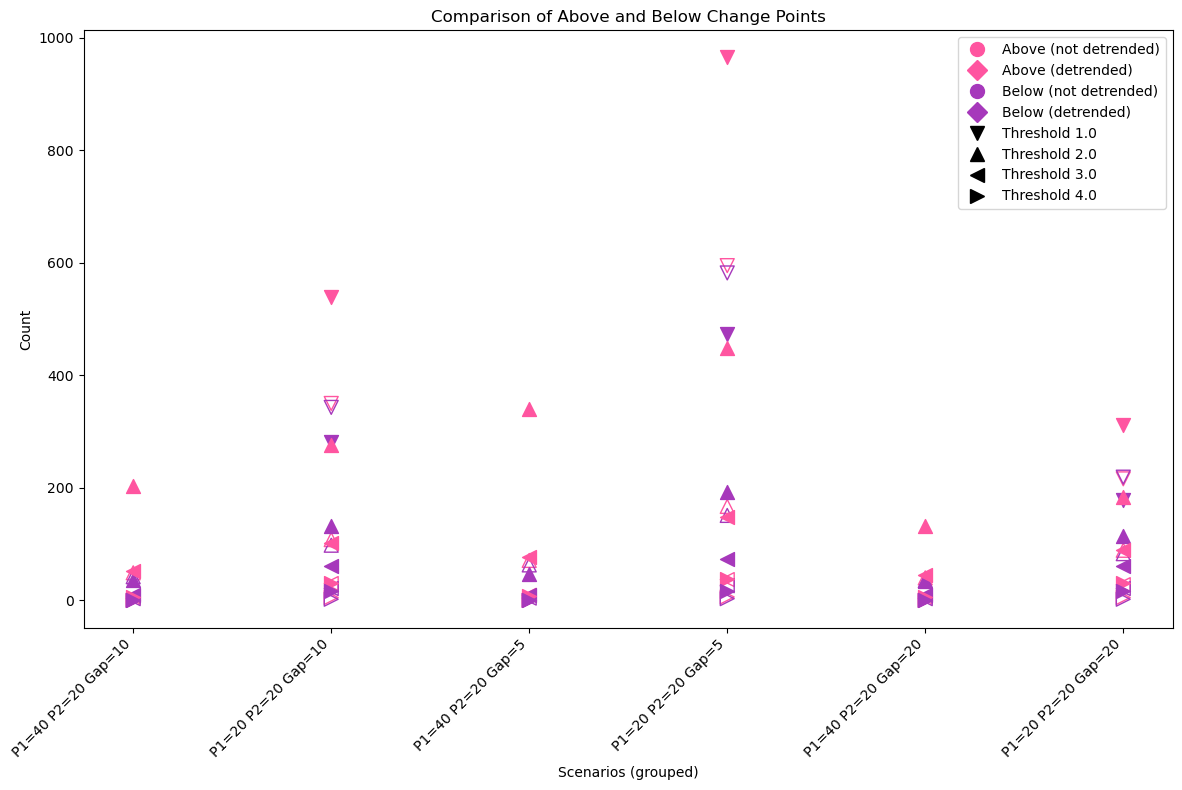

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))  # Width=12 inches, Height=8 inches

colors = {'Above': '#ff55a0', 'Below': '#a638bb'}
markers = {1.0: 'v', 2.0: '^', 3.0: '<', 4.0: '>'}  # Different shapes for thresholds
marker_size = 100  # Adjust this value to increase/decrease marker size

scenario_index = 0
scenario_labels = []

for scenario, data in scenario_groups.items():
    for i in range(len(data['above'])):
        marker_style, threshold = data['styles'][i]
        if marker_style == 'D':  # Diamond marker for detrended
            ax.scatter(scenario_index, data['above'][i], color=colors['Above'], marker=markers[threshold], facecolors='none', edgecolors=colors['Above'], s=marker_size)
            ax.scatter(scenario_index, data['below'][i], color=colors['Below'], marker=markers[threshold], facecolors='none', edgecolors=colors['Below'], s=marker_size)
        else:  # Circle marker for not detrended
            ax.scatter(scenario_index, data['above'][i], color=colors['Above'], marker=markers[threshold], facecolors=colors['Above'], s=marker_size)
            ax.scatter(scenario_index, data['below'][i], color=colors['Below'], marker=markers[threshold], facecolors=colors['Below'], s=marker_size)

    scenario_labels.append(f"P1={scenario[0]} P2={scenario[1]} Gap={scenario[2]}")
    scenario_index += 1

ax.set_xticks(range(len(scenario_groups)))
ax.set_xticklabels(scenario_labels, rotation=45, ha="right")
ax.set_xlabel('Scenarios (grouped)')
ax.set_ylabel('Count')

# Custom legend
legend_elements = [
    mlines.Line2D([], [], color=colors['Above'], marker='o', linestyle='None', markersize=10, label='Above (not detrended)'),
    mlines.Line2D([], [], color=colors['Above'], marker='D', linestyle='None', markersize=10, label='Above (detrended)'),
    mlines.Line2D([], [], color=colors['Below'], marker='o', linestyle='None', markersize=10, label='Below (not detrended)'),
    mlines.Line2D([], [], color=colors['Below'], marker='D', linestyle='None', markersize=10, label='Below (detrended)')
]

for threshold in markers:
    legend_elements.append(mlines.Line2D([], [], color='black', marker=markers[threshold], linestyle='None', markersize=10, label=f'Threshold {threshold}'))

ax.legend(handles=legend_elements, loc='upper right')
ax.set_title('Comparison of Above and Below Change Points')

plt.tight_layout()
plt.show()